<img src="https://github.com/guilherme-rhein/income_prediction/blob/main/full.png?raw=true" alt="Imagem logotipo Ebac">

---

# **Profissão: Cientista de Dados**
## Previsão de renda:

**Aluno:** [Guilherme Rhein](https://www.linkedin.com/in/guilherme-rhein)<br>

---

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

# <div style="text-align:center"> Projeto - Previsão de renda </div>

----
## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira está empenhada em aprimorar sua compreensão acerca do perfil de renda de seus novos clientes, com o intuito de otimizar a definição dos limites de cartões de crédito, sem a necessidade de solicitar comprovantes de renda ou documentos que possam impactar a experiência do cliente.

Para alcançar esse objetivo, a instituição conduziu um estudo detalhado com alguns clientes, validando suas rendas por meio de olerites e outros documentos. Agora, busca desenvolver um modelo preditivo para estimar a renda com base em variáveis existentes em seu banco de dados, visando uma abordagem mais eficiente e personalizada.<br><br>

----


## Etapa 2 Crisp-DM: Entendimento dos dados
### Dicionário de dados


| Variável                | Descrição                                                                | Tipo         |
| ----------------------- |:------------------------------------------------------------------------:| ------------:|
| data_ref                |  Data de coleta das variáveis de referência.                             | object       |
| id_cliente              |  Código identificador do cliente.                                        | int          |
| sexo                    |  Gênero do cliente (M = 'Masculino'; F = 'Feminino').                    | object       |
| posse_de_veiculo        |  True indica posse de veículo e False indica inexistência de veículo.    | bool         |
| posse_de_imovel         |  True indica posse de imóvel e False indica inexistência de imóvel.      | bool         |
| qtd_filhos              |  Número de filhos do cliente.                                            | Int          |
| tipo_renda              |  Define a renda: Empresário, Assalariado, Servidor público, Pensionista, Bolsista. | object |
| educacao                |  Nível de instrução: Primário, Secundário, Superior incompleto, Superior completo, Pós graduação. | object | 
| estado_civil            |  Define o estado civil: Solteiro, União, Casado, Separado, Viúvo.  | object|
| tipo_residencia         |  Define a residência: Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário.| object|
| idade                   |  Idade em anos.                                                          | int|
| tempo_emprego           |  Tempo que permanece estável no emprego atual.                           | float|
| qt_pessoas_residencia   |  Número de pessoas que residem no local.                                 | float|
| renda                   |  Valor de renda em Reais.                                                | float|


----

### Carregando os pacotes:


In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

### Carregando os dados:

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/guilherme-rhein/income_prediction/main/previsao_de_renda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [6]:
df

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  \
0               0  2015-01-01       15056    F             False   
1               1  2015-01-01        9968    M              True   
2               2  2015-01-01        4312    F              True   
3               3  2015-01-01       10639    F             False   
4               4  2015-01-01        7064    M              True   
...           ...         ...         ...  ...               ...   
14995       14995  2016-03-01       16006    F             False   
14996       14996  2016-03-01        3722    F             False   
14997       14997  2016-03-01        6194    F              True   
14998       14998  2016-03-01        4922    M              True   
14999       14999  2016-03-01       14651    F             False   

       posse_de_imovel  qtd_filhos        tipo_renda           educacao  \
0                 True           0        Empresário         Secundário   
1                 True           0       Assalariado  Superior completo   
2                 True           0        Empresário  Superior completo   
3                 True           1  Servidor público  Superior completo   
4                False           0       Assalariado         Secundário   
...                ...         ...               ...                ...   
14995             True           0        Empresário         Secundário   
14996             True           0       Pensionista  Superior completo   
14997             True           0       Assalariado  Superior completo   
14998            False           0        Empresário  Superior completo   
14999             True           2  Servidor público         Secundário   

      estado_civil tipo_residencia  idade  tempo_emprego  \
0         Solteiro            Casa     26       6.602740   
1           Casado            Casa     28       7.183562   
2           Casado            Casa     35       0.838356   
3           Casado            Casa     30       4.846575   
4         Solteiro   Governamental     33       4.293151   
...            ...             ...    ...            ...   
14995     Solteiro            Casa     48      13.887671   
14996     Solteiro            Casa     57            NaN   
14997       Casado            Casa     45       7.832877   
14998       Casado            Casa     36       4.298630   
14999        União            Casa     34       7.219178   

       qt_pessoas_residencia     renda  
0                        1.0   8060.34  
1                        2.0   1852.15  
2                        2.0   2253.89  
3                        3.0   6600.77  
4                        1.0   6475.97  
...                      ...       ...  
14995                    1.0   7990.58  
14996                    1.0  10093.45  
14997                    2.0    604.82  
14998                    2.0   3352.27  
14999                    4.0   1160.99  

[15000 rows x 15 columns]

In [7]:
df = df.drop(columns = 'Unnamed: 0')
df.dropna(inplace=True, ignore_index=True)
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [8]:
print(f"""Nº de Valores Duplicados: {df.duplicated().sum()}
Quantidade total de Linhas e Colunas: {df.shape}\n
Valores Nulos por Coluna:""")
df.isnull().sum()

Nº de Valores Duplicados: 337
Quantidade total de Linhas e Colunas: (12427, 14)

Valores Nulos por Coluna:


data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12090 entries, 0 to 12089
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               12090 non-null  datetime64[ns]
 1   id_cliente             12090 non-null  int64         
 2   sexo                   12090 non-null  object        
 3   posse_de_veiculo       12090 non-null  bool          
 4   posse_de_imovel        12090 non-null  bool          
 5   qtd_filhos             12090 non-null  int64         
 6   tipo_renda             12090 non-null  object        
 7   educacao               12090 non-null  object        
 8   estado_civil           12090 non-null  object        
 9   tipo_residencia        12090 non-null  object        
 10  idade                  12090 non-null  int64         
 11  tempo_emprego          12090 non-null  float64       
 12  qt_pessoas_residencia  12090 non-null  float64       
 13  r

### Entendimento dos dados - Univariada
**Pandas Profiling – Relatório interativo para análise exploratória de dados**<br>
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [11]:
prof = ProfileReport(df, 
                     explorative=True, 
                     minimal=False,
                     dark_mode=True,
                     title="Relatório: Predição de Renda",
                    )
os.makedirs(name='./output', exist_ok=True)
prof.to_file('./output/renda_analysis.html')
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<br>**Estatísticas descritivas:**

In [12]:
df_numeric = (df.select_dtypes(include=['int', 'float'])
                .drop(columns='id_cliente'))
df_numeric.describe().transpose()

count         mean          std         min  \
qtd_filhos             12090.0     0.514309     0.788180    0.000000   
idade                  12090.0    40.660298     9.392296   22.000000   
tempo_emprego          12090.0     7.724567     6.718007    0.117808   
qt_pessoas_residencia  12090.0     2.304218     0.939439    1.000000   
renda                  12090.0  6115.540167  8941.253878  118.710000   

                               25%          50%          75%            max  
qtd_filhos                0.000000     0.000000     1.000000      14.000000  
idade                    33.000000    40.000000    48.000000      67.000000  
tempo_emprego             3.006164     6.013699    10.123288      42.906849  
qt_pessoas_residencia     2.000000     2.000000     3.000000      15.000000  
renda                  2104.430000  3673.615000  6832.372500  245141.670000

### Entendimento dos dados - Bivariadas
#### Relacionamento da Variável de interesse **"Renda"** com todas as outras Variáveis:



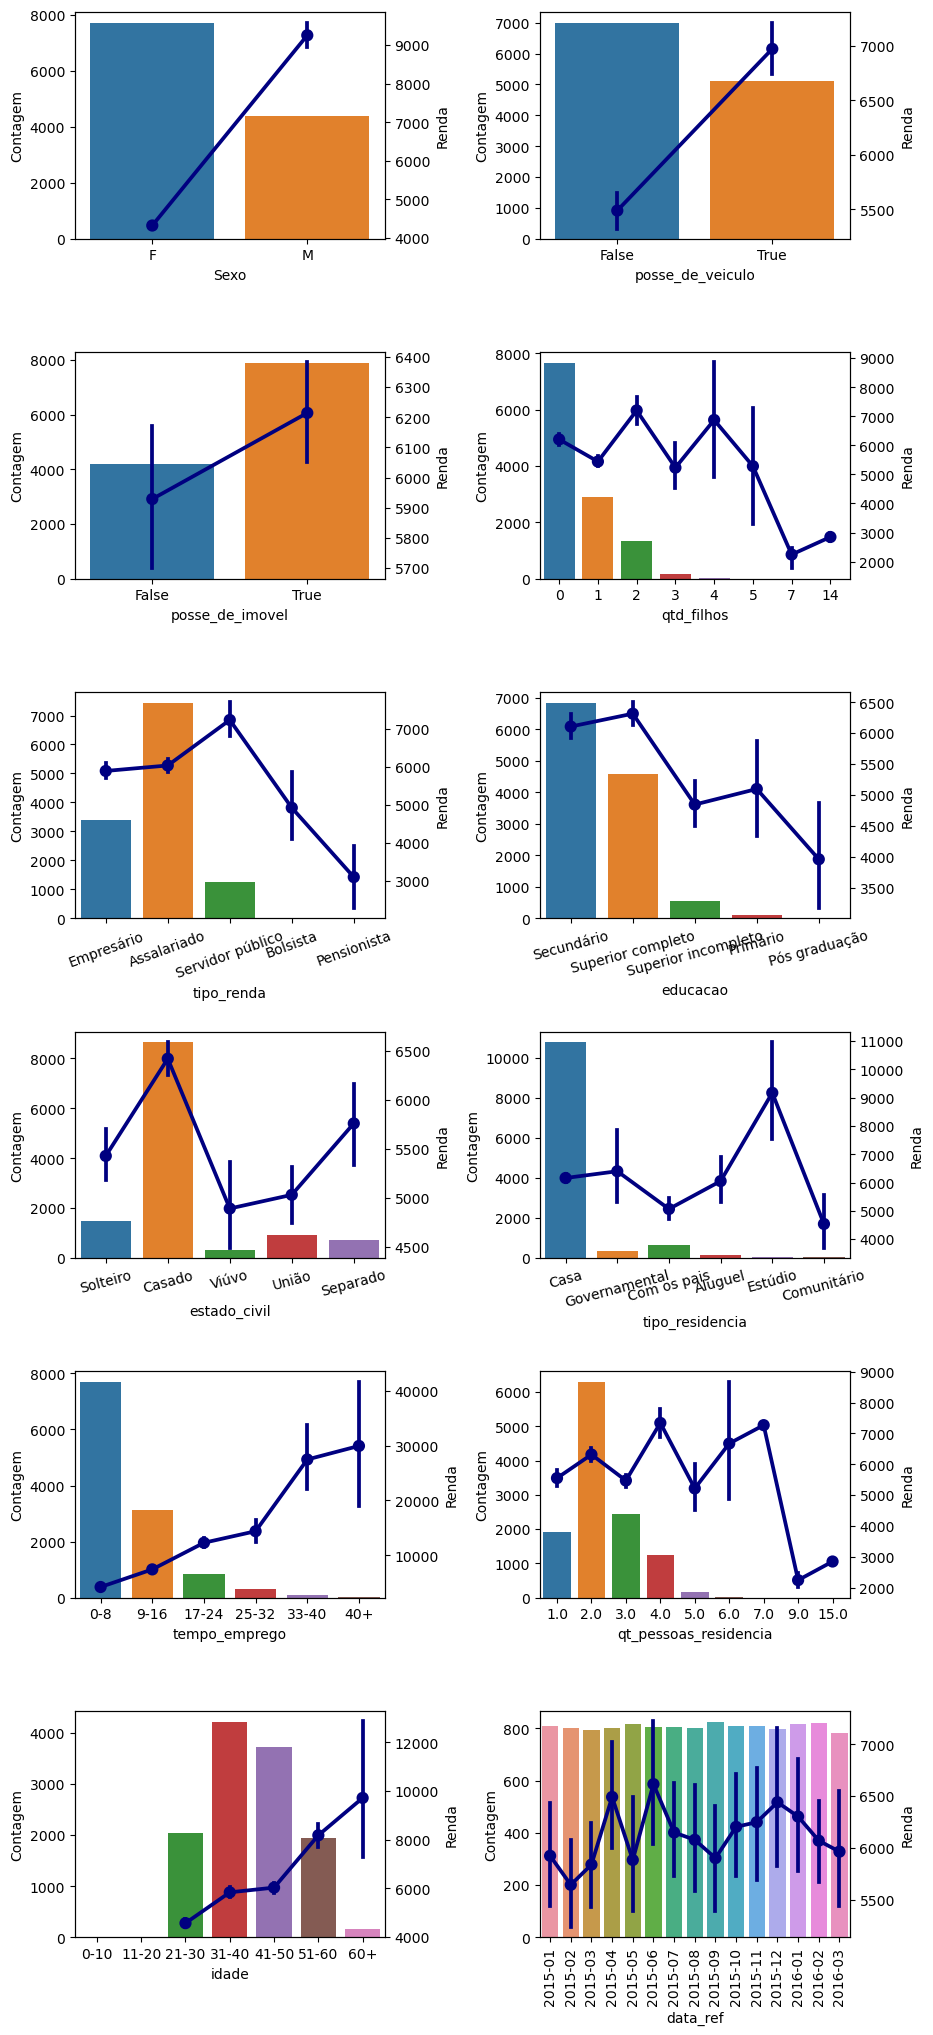

In [13]:
plt.rc('figure', figsize=(10, 25))

fig, axes = plt.subplots(6, 2)

# Gráfico 1: sexo
ax1 = axes[0,0]
sns.countplot(x="sexo", data=df, dodge=True, ax = ax1)
ax1.set_ylabel("Contagem")
ax1.set_xlabel("Sexo")

ax1b = ax1.twinx()
ax1b = sns.pointplot(x="sexo", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 2: posse_de_veiculo
ax2 = axes[0,1]
sns.countplot(x="posse_de_veiculo", data=df, dodge=True, ax = ax2)
ax2.set_ylabel("Contagem")
ax2.set_xlabel("posse_de_veiculo")

ax2b = ax2.twinx()
ax2b = sns.pointplot(x="posse_de_veiculo", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 3: posse_de_imovel
ax3 = axes[1,0]
sns.countplot(x="posse_de_imovel", data=df, dodge=True, ax = ax3)
ax3.set_ylabel("Contagem")
ax3.set_xlabel("posse_de_imovel")

ax3b = ax3.twinx()
ax3b = sns.pointplot(x="posse_de_imovel", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 4: qtd_filhos
ax4 = axes[1,1]
sns.countplot(x="qtd_filhos", data=df, dodge=True, ax = ax4)
ax4.set_ylabel("Contagem")
ax4.set_xlabel("qtd_filhos")

ax4b = ax4.twinx()
ax4b = sns.pointplot(x="qtd_filhos", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 5: tipo_renda
ax5 = axes[2,0]
sns.countplot(x="tipo_renda", data=df, dodge=True, ax = ax5)
ax5.set_ylabel("Contagem")
ax5.set_xlabel("tipo_renda")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=20)

ax5b = ax5.twinx()
ax5b = sns.pointplot(x="tipo_renda", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 6: educacao
ax6 = axes[2,1]
sns.countplot(x="educacao", data=df, dodge=True, ax = ax6)
ax6.set_ylabel("Contagem")
ax6.set_xlabel("educacao")
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=15)

ax6b = ax6.twinx()
ax6b = sns.pointplot(x="educacao", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 7: estado_civil
ax7 = axes[3,0]
sns.countplot(x="estado_civil", data=df, dodge=True, ax = ax7)
ax7.set_ylabel("Contagem")
ax7.set_xlabel("estado_civil")
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=15)

ax7b = ax7.twinx()
ax7b = sns.pointplot(x="estado_civil", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 8: tipo_residencia
ax8 = axes[3,1]
sns.countplot(x="tipo_residencia", data=df, dodge=True, ax = ax8)
ax8.set_ylabel("Contagem")
ax8.set_xlabel("tipo_residencia")
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=15)

ax8b = ax8.twinx()
ax8b = sns.pointplot(x="tipo_residencia", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 9: tempo_emprego
 #Categorizando valores:
df_copy = df.copy()
intervalos = [0, 8, 16, 24, 32, 40, float('inf')]
categorias = pd.cut(df_copy['tempo_emprego'], bins=intervalos, labels=['0-8', '9-16', '17-24', '25-32', '33-40', '40+'])
df_copy['tempo_emprego_categoria'] = categorias
 #Plot:
ax9 = axes[4,0]
sns.countplot(x="tempo_emprego_categoria", data=df_copy, dodge=True, ax = ax9)
ax9.set_ylabel("Contagem")
ax9.set_xlabel("tempo_emprego")

ax9b = ax9.twinx()
ax9b = sns.pointplot(x="tempo_emprego_categoria", y="renda", data=df_copy, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 10: qt_pessoas_residencia
ax10 = axes[4,1]
sns.countplot(x="qt_pessoas_residencia", data=df, dodge=True, ax = ax10)
ax10.set_ylabel("Contagem")
ax10.set_xlabel("qt_pessoas_residencia")

ax10b = ax10.twinx()
ax10b = sns.pointplot(x="qt_pessoas_residencia", y="renda", data=df, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 11: idade
 #Categorizando valores:
intervalos = [0, 10, 20, 30, 40, 50, 60, float('inf')]
categorias = pd.cut(df_copy['idade'], bins=intervalos, labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+'])
df_copy['idade_categoria'] = categorias
 #Plot:
ax11 = axes[5,0]
sns.countplot(x="idade_categoria", data=df_copy, dodge=True, ax = ax11)
ax11.set_ylabel("Contagem")
ax11.set_xlabel("idade")

ax11b = ax11.twinx()
ax11b = sns.pointplot(x="idade_categoria", y="renda", data=df_copy, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")


# Gráfico 12: data_ref
  #Categorizando valores:
df_copy['data_categoria'] = df_copy['data_ref'].dt.to_period('M')
 #Plot:
ax12 = axes[5,1]
sns.countplot(x="data_categoria", data=df_copy, dodge=True, ax = ax12)
ax12.set_ylabel("Contagem")
ax12.set_xlabel("data_ref")
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=90)

ax12b = ax12.twinx()
ax12b = sns.pointplot(x="data_categoria", y="renda", data=df_copy, dodge=True, errorbar=('ci', 90), color = 'navy')
plt.ylabel("Renda")

plt.subplots_adjust(wspace=.5, hspace=0.5)

 - O resultado da variável de interesse **"renda"** relacionada com todas as outras variáveis nos gráficos acima, é fundamental para desvendar padrões e insights ocultos em conjuntos de dados. Essa abordagem permite identificar correlações, padrões e possíveis causas subjacentes, oferecendo uma compreensão mais profunda do contexto em que a variável de interesse está inserida. Ao relacionar todas as variáveis, a análise exploratória torna-se uma ferramenta poderosa para revelar insights valiosos, informando decisões e estratégias com base em uma compreensão mais completa e precisa dos dados.<br><br><br>
 
 - Com o gráfico, conseguimos perceber o volume da informação, além do valor de renda de acordo com a categoria relacionada:
   - Em **"idade"** é possível concluir que quanto mais maduro, maior a renda e o maior volume está entre **"31-40"** anos.<br><br>
 - Esclarecemos também outro fato relevante no exempo do gráfico **"posse_de_imovel":**
   - Podemos perceber que a variação de renda é muito estreira, o que acaba por linearizar os dados dificultando a possibilidade de definir padrões nas previsões.S
   

<br>**Correlação dos dados:**

In [14]:
# Correlação Geral:
(df.select_dtypes(include=['int', 'float','bool'])
   .drop(columns='id_cliente')
   .corr())

posse_de_veiculo  posse_de_imovel  qtd_filhos  \
posse_de_veiculo               1.000000         0.011541    0.087291   
posse_de_imovel                0.011541         1.000000    0.007935   
qtd_filhos                     0.087291         0.007935    1.000000   
idade                         -0.107792         0.096408   -0.278645   
tempo_emprego                 -0.074186         0.011015   -0.063588   
qt_pessoas_residencia          0.133048         0.004863    0.902149   
renda                          0.082040         0.015187    0.003422   

                          idade  tempo_emprego  qt_pessoas_residencia  \
posse_de_veiculo      -0.107792      -0.074186               0.133048   
posse_de_imovel        0.096408       0.011015               0.004863   
qtd_filhos            -0.278645      -0.063588               0.902149   
idade                  1.000000       0.321970              -0.253026   
tempo_emprego          0.321970       1.000000              -0.067115   
qt_pessoas_residencia -0.253026      -0.067115               1.000000   
renda                  0.127516       0.385014               0.019571   

                          renda  
posse_de_veiculo       0.082040  
posse_de_imovel        0.015187  
qtd_filhos             0.003422  
idade                  0.127516  
tempo_emprego          0.385014  
qt_pessoas_residencia  0.019571  
renda                  1.000000

In [15]:
# Variável de interesse Int, Float, Bool:
(df.select_dtypes(include=['int', 'float','bool'])
   .drop(columns='id_cliente')
   .corr()
   .iloc[6:,:])

posse_de_veiculo  posse_de_imovel  qtd_filhos     idade  tempo_emprego  \
renda           0.08204         0.015187    0.003422  0.127516       0.385014   

       qt_pessoas_residencia  renda  
renda               0.019571    1.0

In [16]:
# Correlação Geral add Int, Float, Bool + "sexo":

df_numeric_bool_sexo = df[['posse_de_veiculo', 'posse_de_imovel', 
                           'qtd_filhos', 'idade','tempo_emprego', 
                           'qt_pessoas_residencia', 'renda', 'sexo']]
# Masculino = 1 e Feminino = 0
df_numeric_bool_sexo['sexo'] = df_numeric_bool_sexo['sexo'].map({'F': 0, 'M':1})





(df_numeric_bool_sexo.select_dtypes(include=['int', 'float','bool'])
                     .corr())

# Variável de interesse:
(df_numeric_bool_sexo.corr()
                     .iloc[6:7,:])


C:\Users\Guilherme Rhein\AppData\Local\Temp\ipykernel_7396\4138439964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric_bool_sexo['sexo'] = df_numeric_bool_sexo['sexo'].map({'F': 0, 'M':1})


posse_de_veiculo  posse_de_imovel  qtd_filhos     idade  tempo_emprego  \
renda           0.08204         0.015187    0.003422  0.127516       0.385014   

       qt_pessoas_residencia  renda      sexo  
renda               0.019571    1.0  0.265174

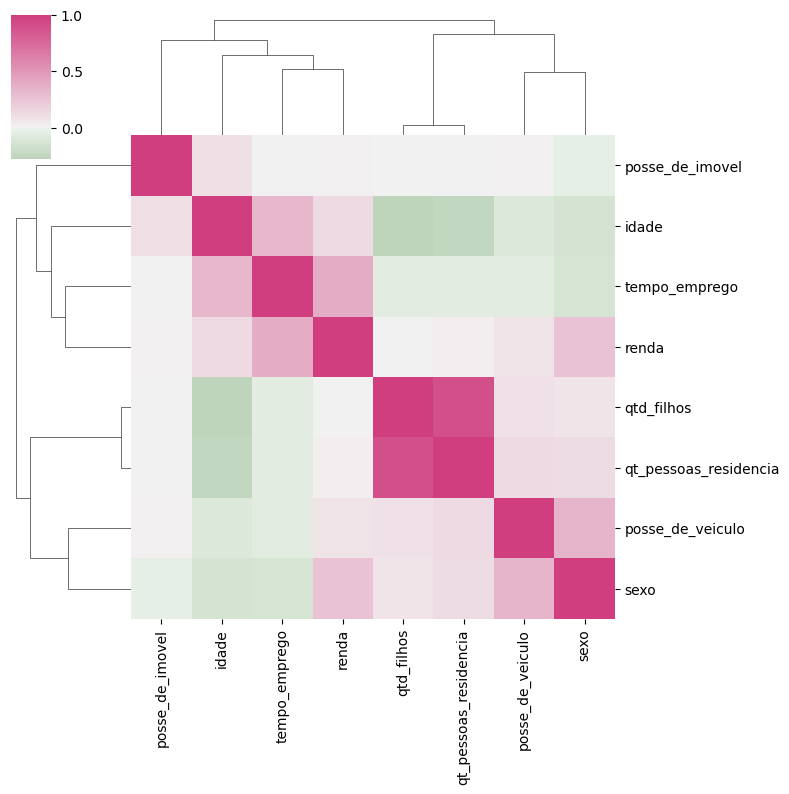

In [17]:
cmap = sns.diverging_palette(h_neg=125, 
                             h_pos=350, 
                             as_cmap=True, 
                             sep = 1,
                             center = 'light')

sns.clustermap(df_numeric_bool_sexo.corr(),
               figsize=(8, 8), 
               center = 0, 
               cmap=cmap)

C:\Users\Guilherme Rhein\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


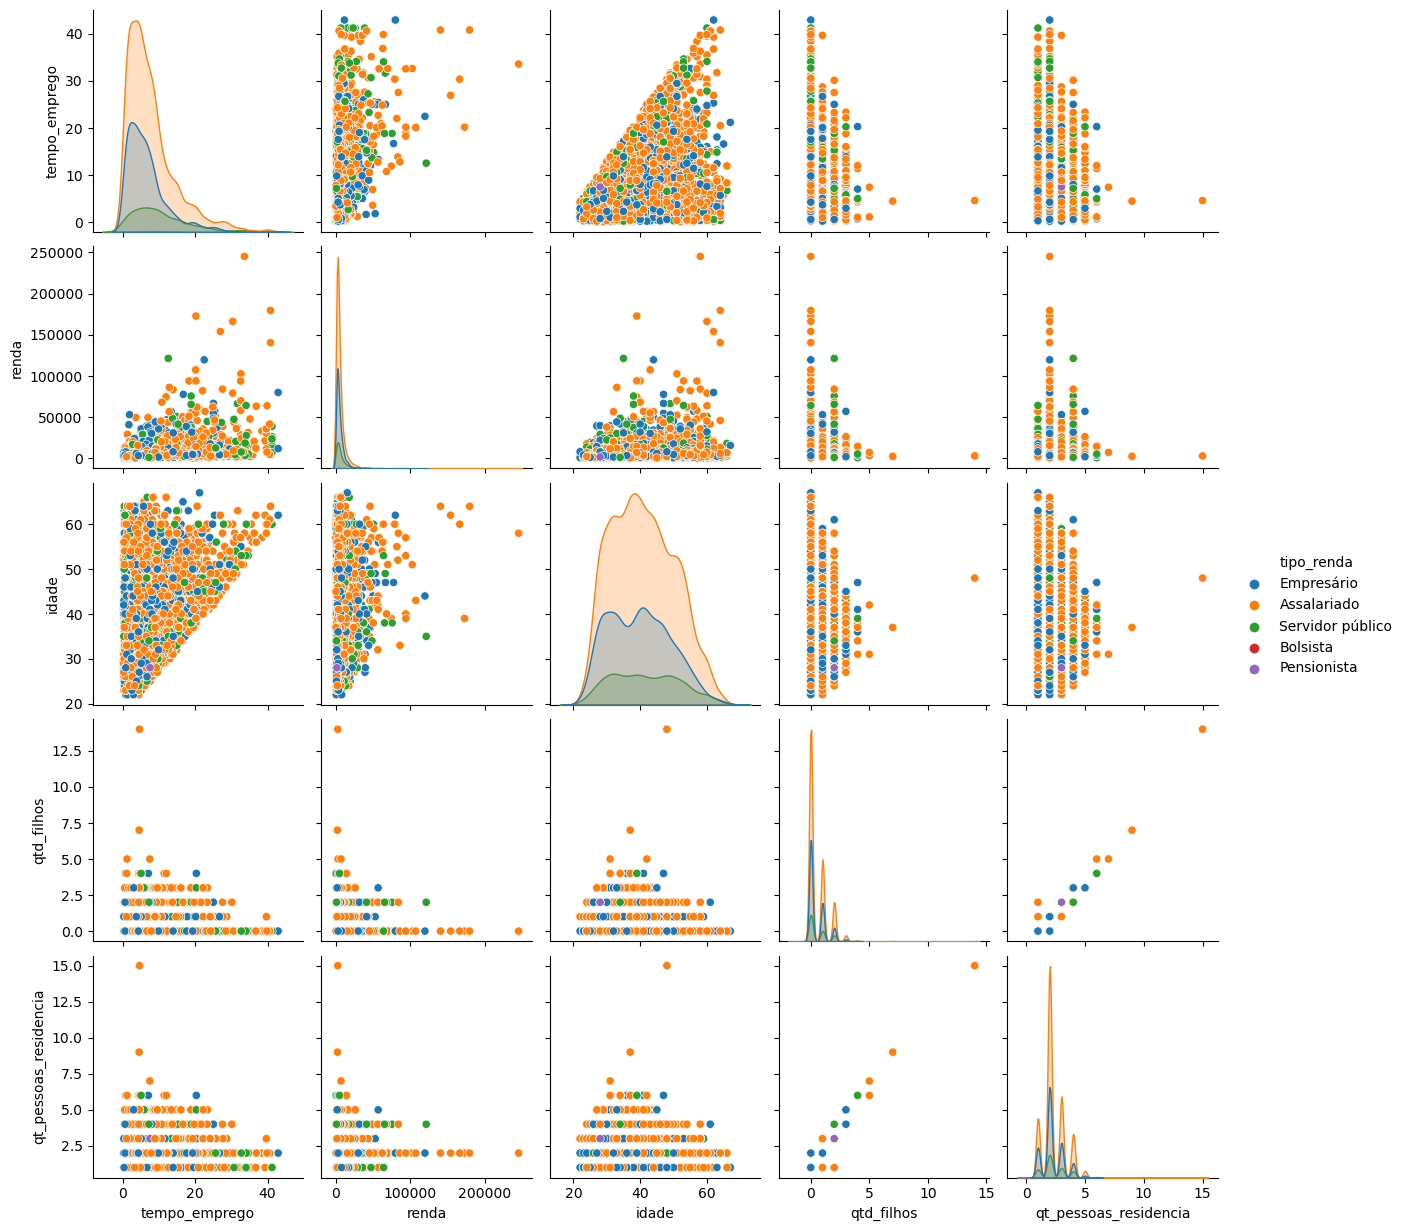

In [18]:
sns.pairplot(data=df, 
             vars= ['tempo_emprego','renda', 'idade',
                    'qtd_filhos', 'qt_pessoas_residencia'], 
             hue='tipo_renda', diag_kind='kde')

plt.show()

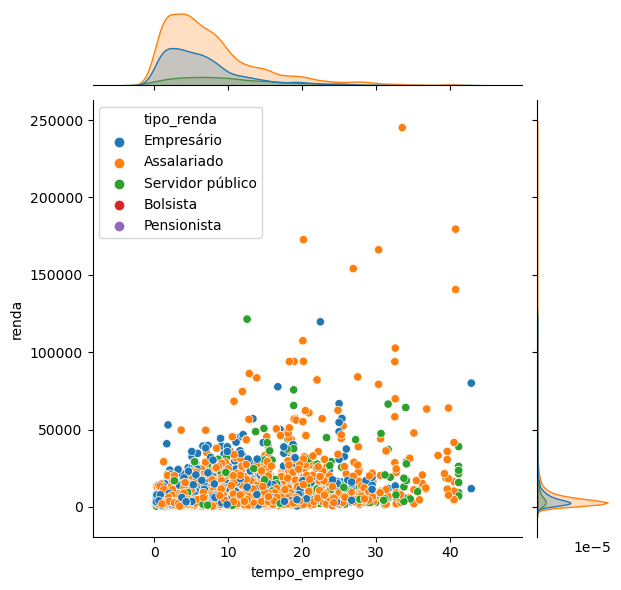

In [19]:
sns.jointplot(data=df, x="tempo_emprego", y="renda", hue = 'tipo_renda')
plt.show()

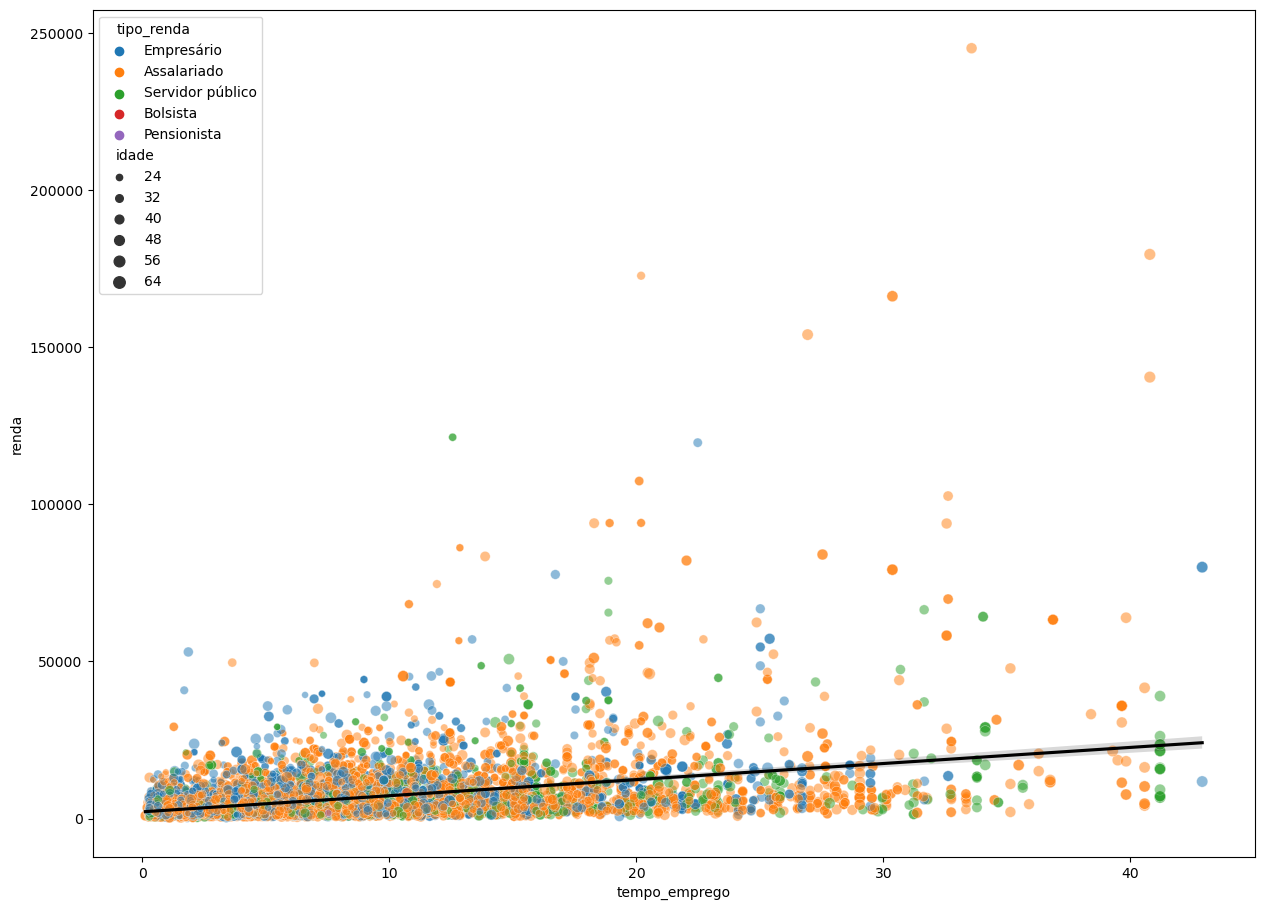

In [20]:
plt.figure(figsize=(15,11))

sns.scatterplot(x = 'tempo_emprego'
                , y = 'renda'
                , data = df
                , alpha = .5
                , hue = 'tipo_renda'
                , size = 'idade'
               )

sns.regplot(x = 'tempo_emprego', 
            y = 'renda', 
            data = df, 
            scatter=False, 
            color='black')
plt.show()

**Nível de Correlação:**<br>
 - 100% renda > 38.5% tempo_emprego > 26.5% sexo > 12.7% idade > 8.2% posse_de_veiculo > 1.9% qt_pessoas_residencia ><br> 1.5% posse_de_imovel > 0.3% qtd_filhos<br><br>
 - Inicialmete podemos dizer que existe uma correlação substancialmente reduzida entre a maioria das variáveis, consolidando e corroborando as conclusões previamente extraídas da análise na matriz de correlação.<br><br>
 
 - Ao examinar a matriz de dispersão, torna-se evidente a presença de alguns valores discrepantes na variável de renda. Existem alguns outliers que são de grande importância para reconhecer seu potencial impacto nos resultados da análise de tendências.<br><br>

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [21]:
renda=(df.drop(columns=['data_ref','id_cliente']))
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12090 entries, 0 to 12089
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12090 non-null  object 
 1   posse_de_veiculo       12090 non-null  bool   
 2   posse_de_imovel        12090 non-null  bool   
 3   qtd_filhos             12090 non-null  int64  
 4   tipo_renda             12090 non-null  object 
 5   educacao               12090 non-null  object 
 6   estado_civil           12090 non-null  object 
 7   tipo_residencia        12090 non-null  object 
 8   idade                  12090 non-null  int64  
 9   tempo_emprego          12090 non-null  float64
 10  qt_pessoas_residencia  12090 non-null  float64
 11  renda                  12090 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 968.3+ KB


**Nível de Correlação entre variáveis Dummies:**<br>


In [22]:
renda_dm = pd.get_dummies(data=renda)
renda_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12090 entries, 0 to 12089
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  bool   
 8   sexo_M                         12090 non-null  bool   
 9   tipo_renda_Assalariado         12090 non-null  bool   
 10  tipo_renda_Bolsista            12090 non-null  bool   
 11  tipo_renda_Empresário          12090 non-null  bool   
 12  tipo_renda_Pensionista         12090 non-null 

In [23]:
(renda_dm.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .assign(correlação_pct=lambda x: round(x.renda * 100, 2))
              .rename(columns={'index':'Variável',
                               'renda':'Correlação',
                               'correlação_pct':'%'}))

Variável  Correlação       %
0                           renda    1.000000  100.00
1                   tempo_emprego    0.385014   38.50
2                          sexo_M    0.265174   26.52
3                           idade    0.127516   12.75
4                posse_de_veiculo    0.082040    8.20
5             estado_civil_Casado    0.054290    5.43
6     tipo_renda_Servidor público    0.042177    4.22
7         tipo_residencia_Estúdio    0.026417    2.64
8           qt_pessoas_residencia    0.019571    1.96
9      educacao_Superior completo    0.017425    1.74
10                posse_de_imovel    0.015187    1.52
11           tipo_residencia_Casa    0.014234    1.42
12  tipo_residencia_Governamental    0.005464    0.55
13                     qtd_filhos    0.003422    0.34
14        tipo_residencia_Aluguel   -0.000885   -0.09
15            educacao_Secundário   -0.001102   -0.11
16            tipo_renda_Bolsista   -0.003635   -0.36
17         tipo_renda_Pensionista   -0.009199   -0.92
18          estado_civil_Separado   -0.009983   -1.00
19              educacao_Primário   -0.010567   -1.06
20         tipo_renda_Assalariado   -0.011170   -1.12
21         educacao_Pós graduação   -0.011202   -1.12
22    tipo_residencia_Comunitário   -0.012563   -1.26
23          tipo_renda_Empresário   -0.015579   -1.56
24             estado_civil_Viúvo   -0.022352   -2.24
25    tipo_residencia_Com os pais   -0.028160   -2.82
26          estado_civil_Solteiro   -0.028833   -2.88
27   educacao_Superior incompleto   -0.030905   -3.09
28             estado_civil_União   -0.034453   -3.45
29                         sexo_F   -0.265174  -26.52

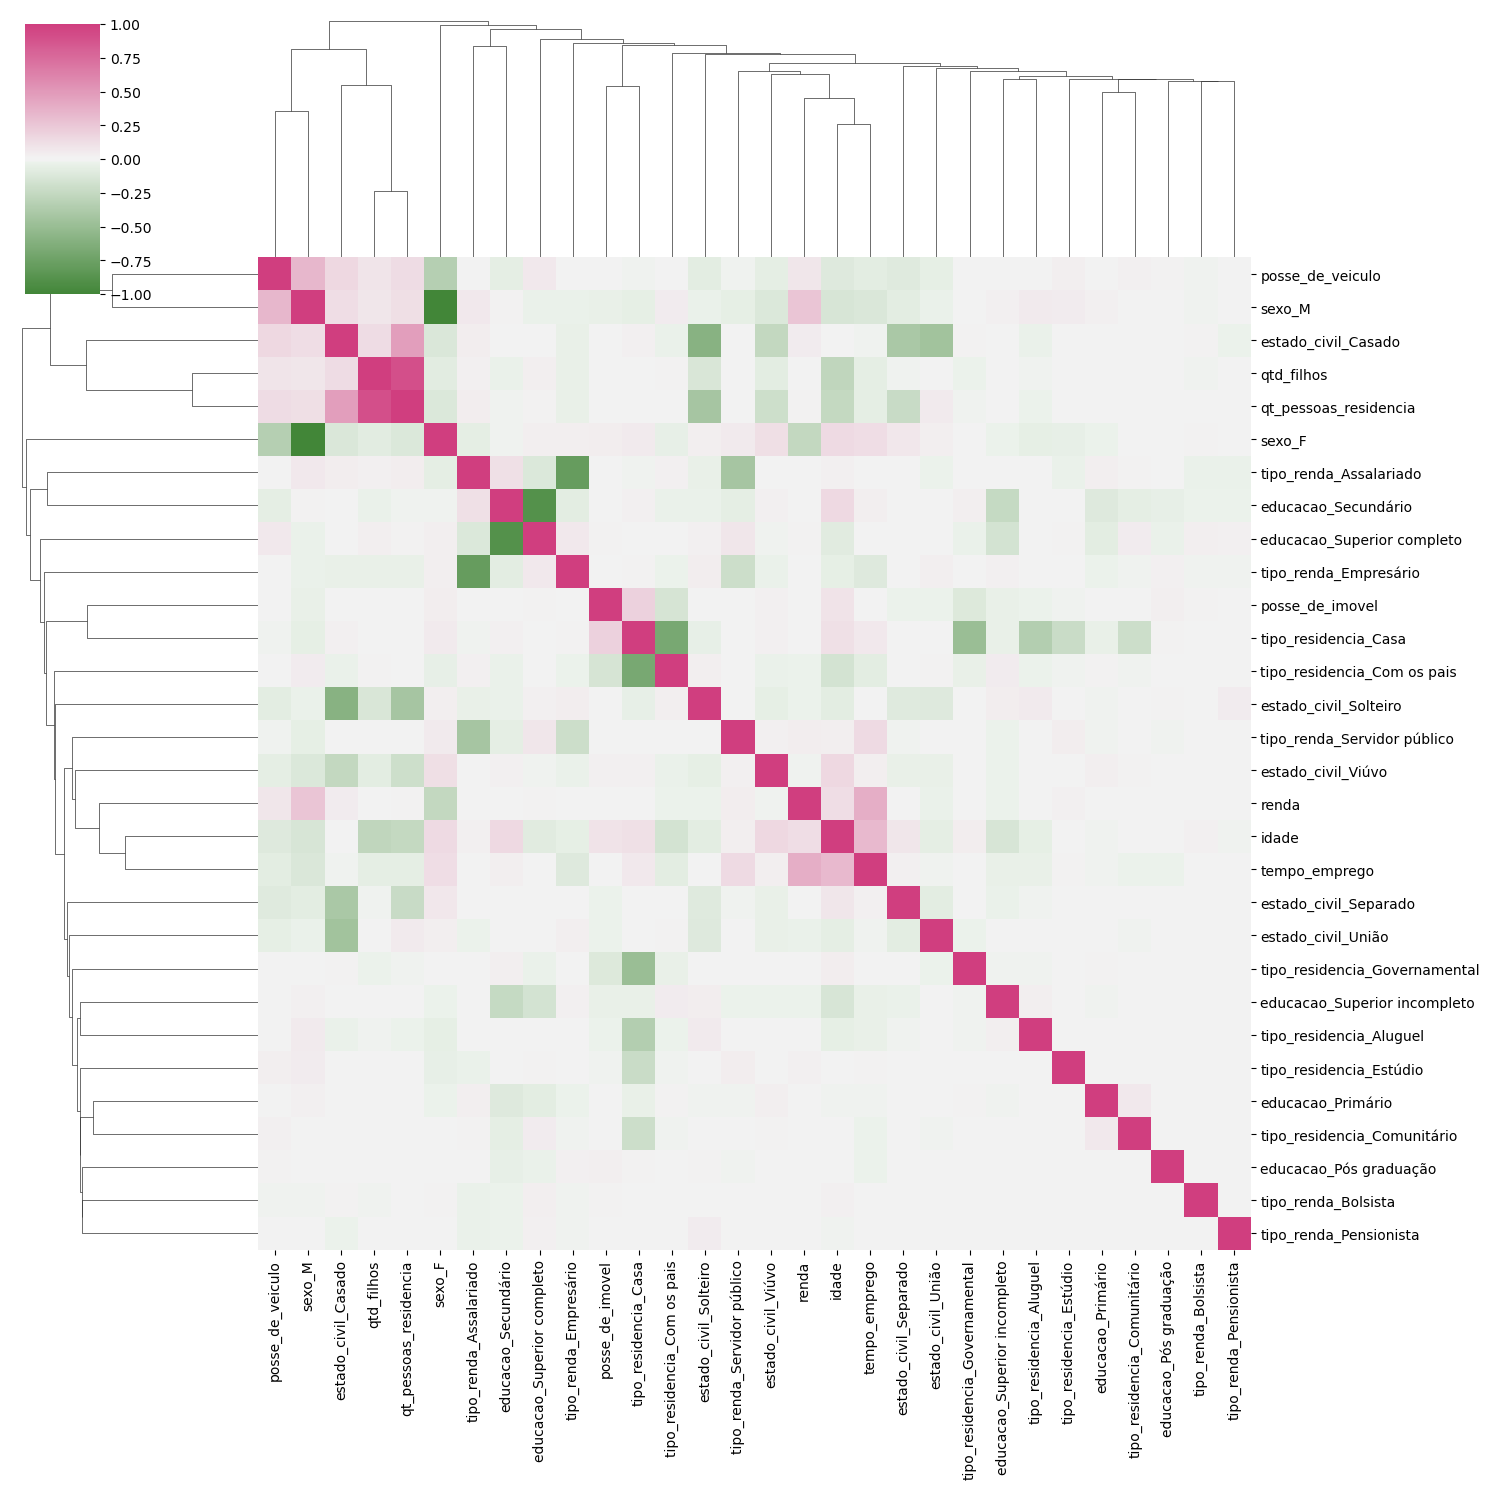

In [24]:
cmap = sns.diverging_palette(h_neg=125, 
                             h_pos=350, 
                             as_cmap=True, 
                             sep = 5,
                             center = 'light')

sns.clustermap(renda_dm.corr(),
               figsize=(15,15), 
               center = 0, 
               cmap=cmap)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem:
    - DecisionTreeRegressor foi a técnica definida para o modelo, é uma escolha apropriada quando você está lidando com problemas em que a predição será numérica. Ele é especialmente útil quando há relações não-lineares entre as variáveis independentes e a variável dependente. Por outro lado, as árvores de decisão convencionais, como o DecisionTreeClassifier, são comumente usadas para problemas de classificação, onde a variável de saída é categórica e representa classes ou rótulos. Essas árvores são eficazes para tomar decisões com base em características discretas.
- Desenho do teste
- Avaliação do modelo


**Definindo X e y para encontrar melhores valores de profundidade e folhas:**

In [25]:
X= renda_dm.drop(columns='renda').copy()
y= renda_dm.renda.copy()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

n_minimo            5         6         7         8         9         10  \
profundidade                                                               
1             0.091443  0.091443  0.091443  0.091443  0.091443  0.091443   
2             0.276985  0.276985  0.276985  0.276985  0.276985  0.276985   
3             0.362481  0.362481  0.362481  0.362481  0.362481  0.362481   
4             0.409650  0.409650  0.410189  0.380615  0.380615  0.385847   
5             0.403336  0.407131  0.397300  0.371954  0.371954  0.377186   
6             0.381836  0.387297  0.387275  0.371668  0.371200  0.377823   
7             0.377644  0.385017  0.383042  0.359336  0.358065  0.367424   
8             0.389528  0.402048  0.401857  0.372881  0.370888  0.378347   
9             0.403432  0.416139  0.413586  0.382830  0.378992  0.380945   
10            0.397979  0.412058  0.411031  0.389437  0.385576  0.383477   
11            0.394112  0.410193  0.408720  0.390731  0.385527  0.382757   
12            0.404468  0.414308  0.411874  0.391489  0.386625  0.382631   
13            0.397762  0.409499  0.407147  0.390170  0.386893  0.383927   
14            0.396877  0.407891  0.407646  0.392067  0.387281  0.383135   

n_minimo            11        12        13        14        15        16  \
profundidade                                                               
1             0.091443  0.091443  0.091443  0.091443  0.091443  0.091443   
2             0.276985  0.276985  0.276985  0.276985  0.276985  0.276985   
3             0.362481  0.362481  0.362481  0.362481  0.362481  0.362481   
4             0.385847  0.385847  0.385847  0.382689  0.382689  0.382689   
5             0.377186  0.376929  0.376929  0.376758  0.378857  0.379474   
6             0.391611  0.393958  0.390220  0.392048  0.394611  0.395228   
7             0.383653  0.386000  0.386405  0.389392  0.392186  0.392803   
8             0.390729  0.394066  0.388312  0.391340  0.393910  0.396580   
9             0.393648  0.396012  0.388132  0.394756  0.397603  0.400312   
10            0.395788  0.397591  0.389010  0.396951  0.399655  0.399744   
11            0.395048  0.396716  0.388845  0.397974  0.401280  0.401590   
12            0.394556  0.396689  0.389694  0.399070  0.402274  0.402078   
13            0.396007  0.397402  0.390878  0.399263  0.402377  0.402144   
14            0.395863  0.397391  0.391026  0.399575  0.402768  0.402396   

n_minimo            17        18        19  
profundidade                                
1             0.091443  0.091443  0.091443  
2             0.276985  0.276985  0.276985  
3             0.362481  0.362481  0.362481  
4             0.382689  0.382689  0.382689  
5             0.379474  0.379474  0.379474  
6             0.392019  0.392109  0.390966  
7             0.396714  0.391674  0.391979  
8             0.395878  0.389445  0.389492  
9             0.398570  0.391727  0.392545  
10            0.398307  0.391783  0.391321  
11            0.398963  0.392128  0.392696  
12            0.399829  0.393178  0.393628  
13            0.399072  0.392678  0.393205  
14            0.399423  0.392335  0.392809

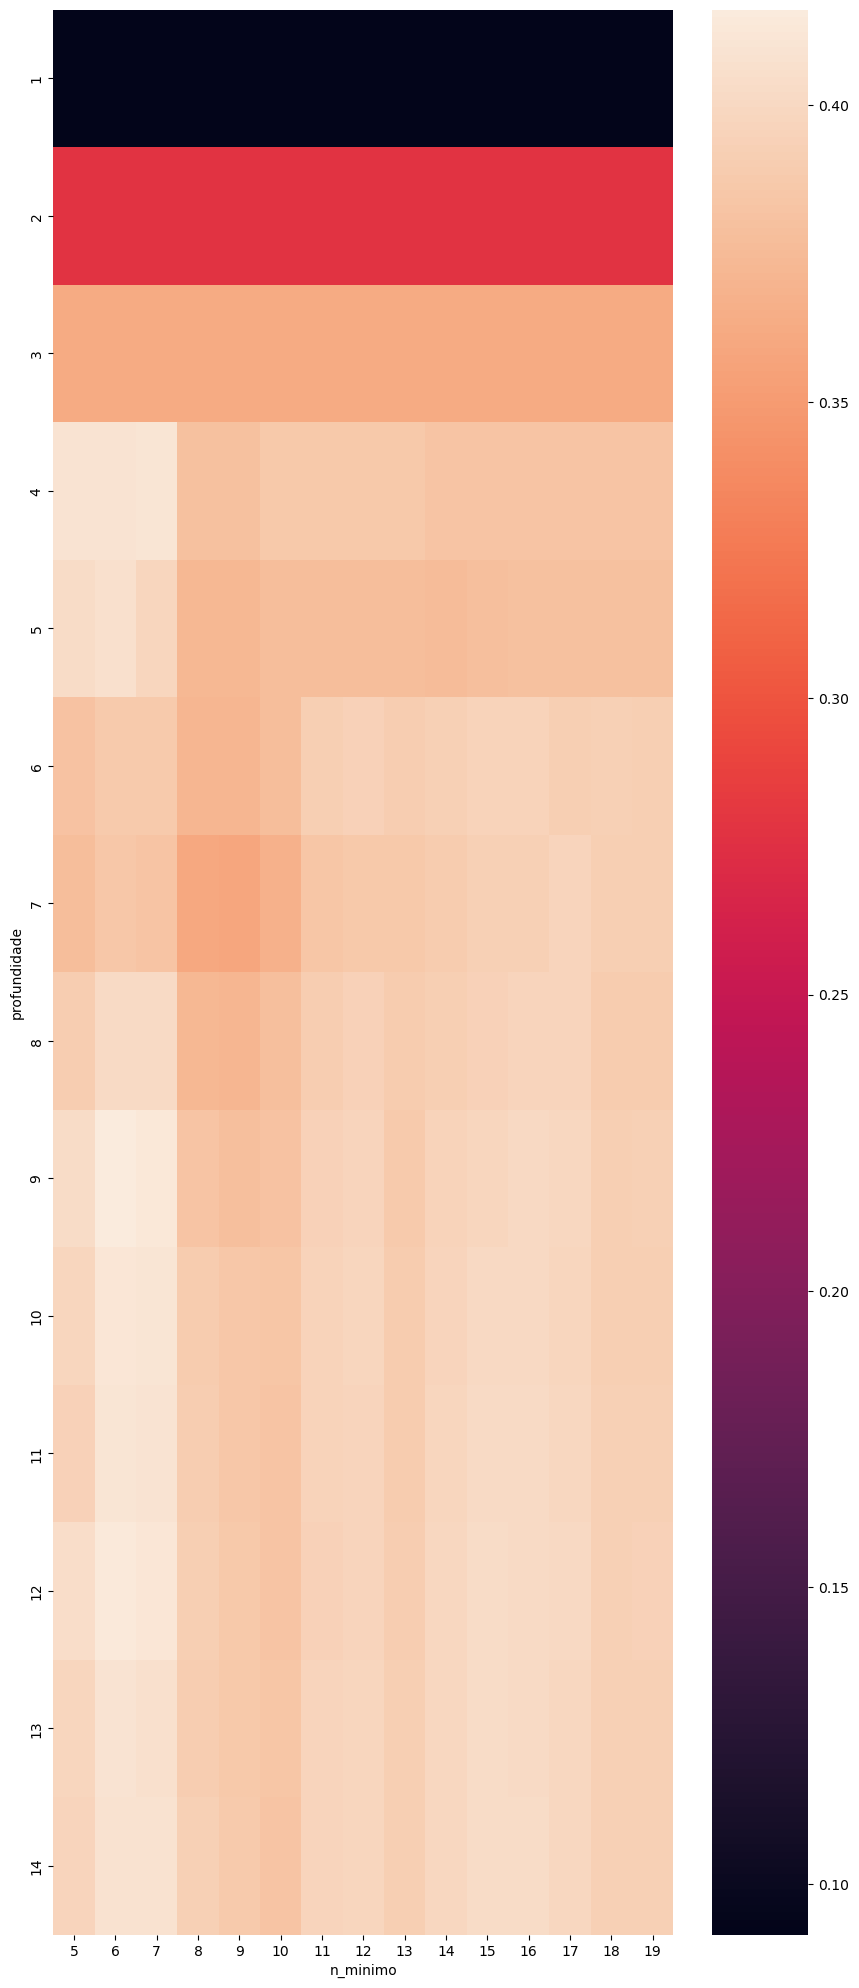

In [27]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 15):
    for j in range(5, 20):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j, random_state=62)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

**Modelo Definido:**

In [28]:
reg = DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, random_state=62)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=6, random_state=62)

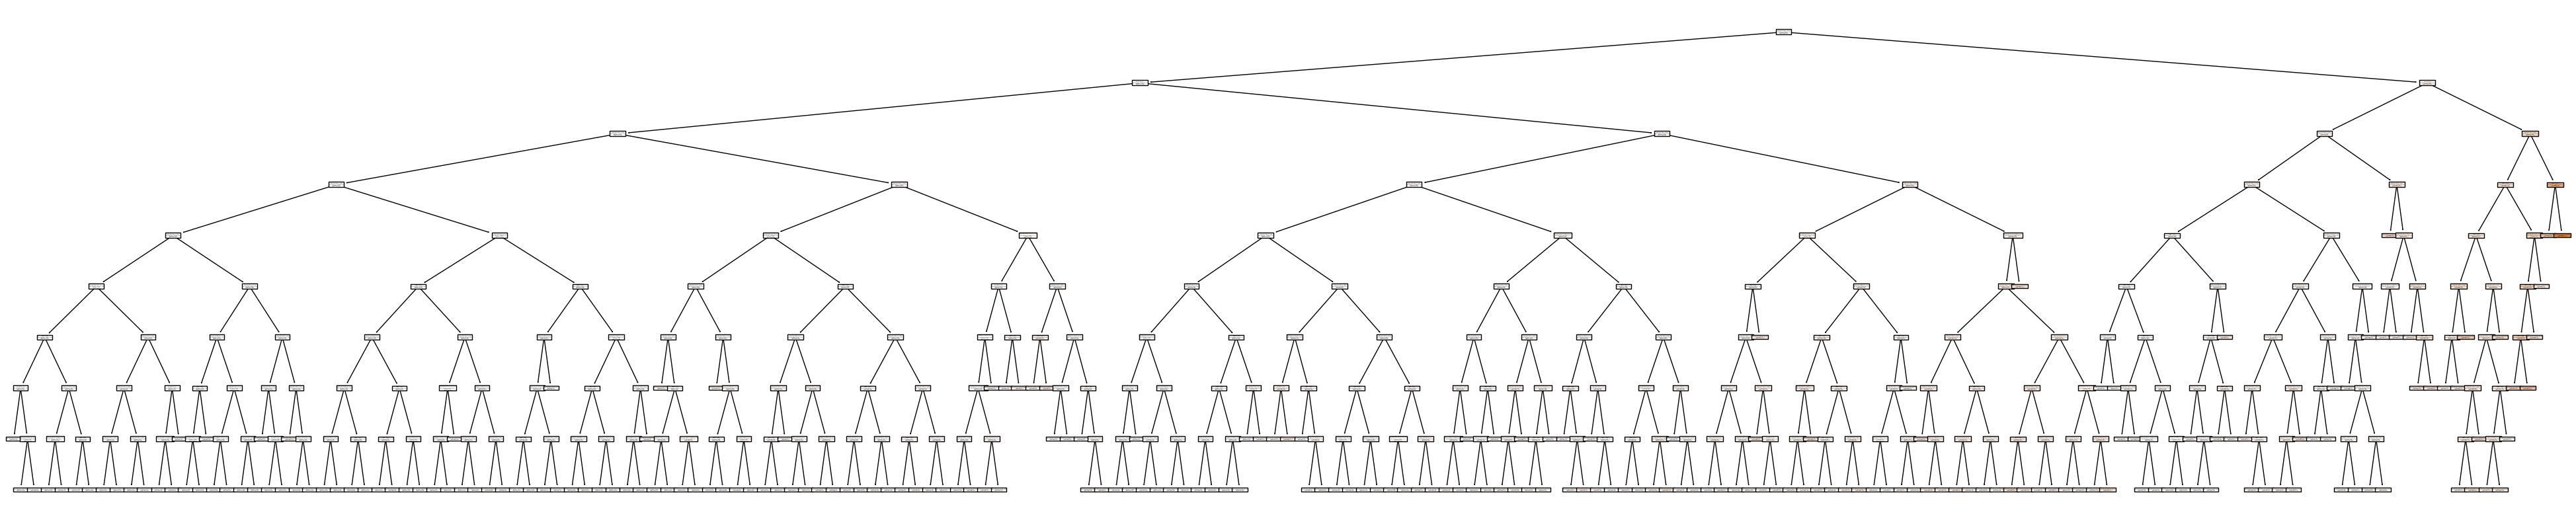

In [29]:
plt.rc('figure', figsize=(50, 10))
tp = tree.plot_tree(reg, 
                    feature_names=X.columns,  
                    filled=True) 

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [30]:
print(f"profundidade: {reg.tree_.max_depth}")
print(f"R² na base de testes: {reg.score(X_test, y_test):.2f}")
print(f"R² na base de treino: {reg.score(X_train, y_train):.2f}")

profundidade: 9
R² na base de testes: 0.42
R² na base de treino: 0.62


In [31]:
ava = renda_dm.copy()
ava['pred_renda'] = np.round(reg.predict(X), 2)
ava[['renda', 'pred_renda']]

renda  pred_renda
0      8060.34     5592.38
1      1852.15     7375.67
2      2253.89     2943.95
3      6600.77     3726.66
4      6475.97     5411.43
...        ...         ...
12085  1592.57    10071.99
12086  7990.58     4674.83
12087   604.82     3726.66
12088  3352.27     5411.43
12089  1160.99     2954.56

[12090 rows x 2 columns]

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [32]:
df.columns

Index(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [33]:
entrada_data = {'sexo': 'M', 
                'posse_de_veiculo': True, 
                'posse_de_imovel': True, 
                'qtd_filhos': 0, 
                'tipo_renda': 'Assalariado', 
                'educacao': 'Superior completo', 
                'estado_civil': 'Solteiro', 
                'tipo_residencia': 'Casa', 
                'idade': 27, 
                'tempo_emprego': 1, 
                'qt_pessoas_residencia': 3}

entrada = pd.DataFrame([entrada_data])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
renda_prevista = reg.predict(entrada).item()

renda_formatada = f"R${renda_prevista:.2f}".replace('.', ',')
print(f"Renda estimada: {renda_formatada}")

Renda estimada: R$3225,05
